2025-12-24 10:36:21,809 - data_preprocessing - INFO - Loading datasets...
2025-12-24 10:36:23,720 - data_preprocessing - INFO - Fraud data shape: (151112, 11)
2025-12-24 10:36:23,720 - data_preprocessing - INFO - IP-Country data shape: (138846, 3)
2025-12-24 10:36:23,720 - data_preprocessing - INFO - Credit card data shape: (284807, 31)
2025-12-24 10:36:23,720 - data_preprocessing - INFO - Cleaning fraud data...
2025-12-24 10:36:24,028 - data_preprocessing - INFO - Cleaned fraud data shape: (151112, 11)
2025-12-24 10:36:24,030 - data_preprocessing - INFO - Mapping IP addresses to countries...
2025-12-24 10:49:48,787 - data_preprocessing - INFO - Countries mapped. Unique countries: 1
2025-12-24 10:49:48,797 - data_preprocessing - INFO - Class distribution: {0: np.int64(136961), 1: np.int64(14151)}
2025-12-24 10:49:48,798 - data_preprocessing - INFO - Fraud ratio: 0.103321
2025-12-24 10:49:48,798 - data_preprocessing - INFO - Fraud percentage: 9.3646%
2025-12-24 10:49:48,799 - feature_en

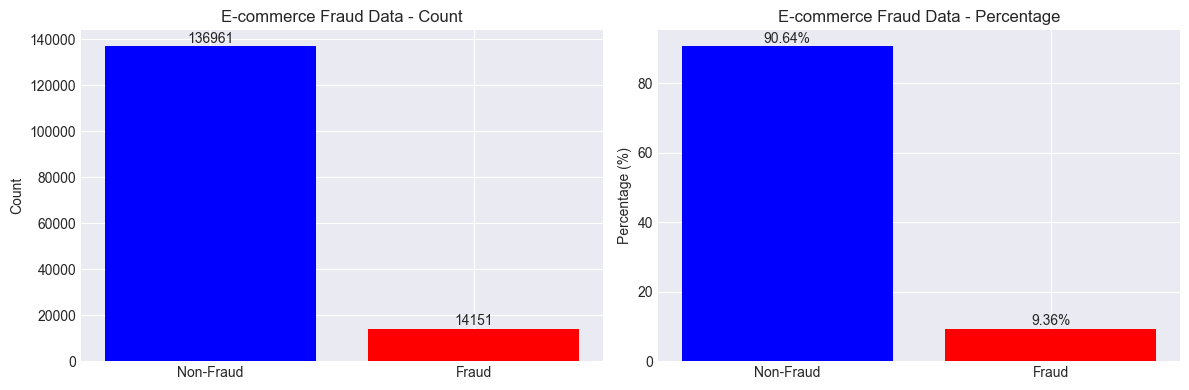

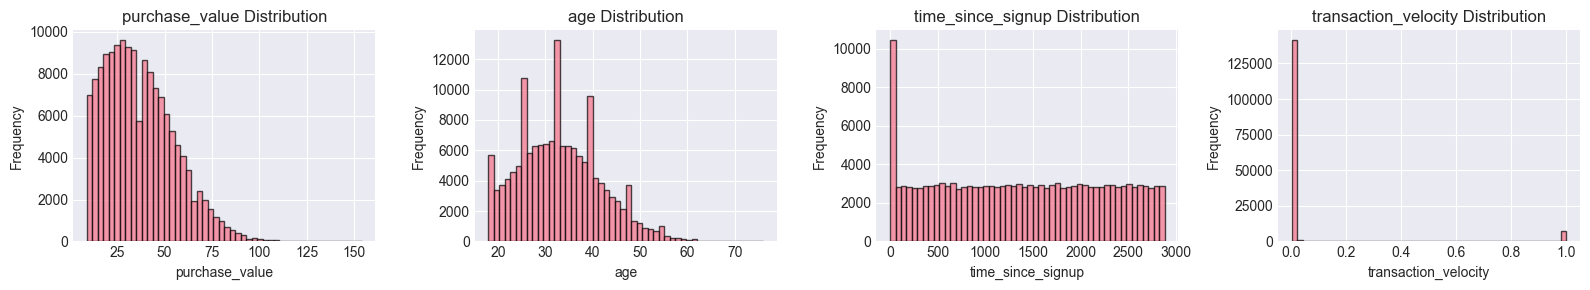

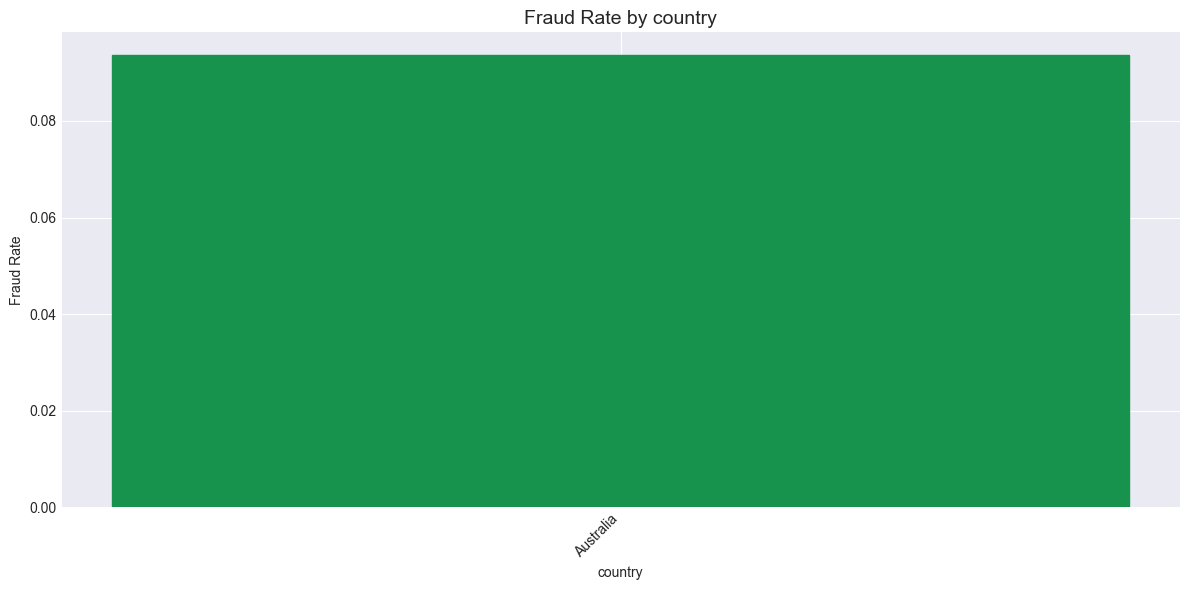

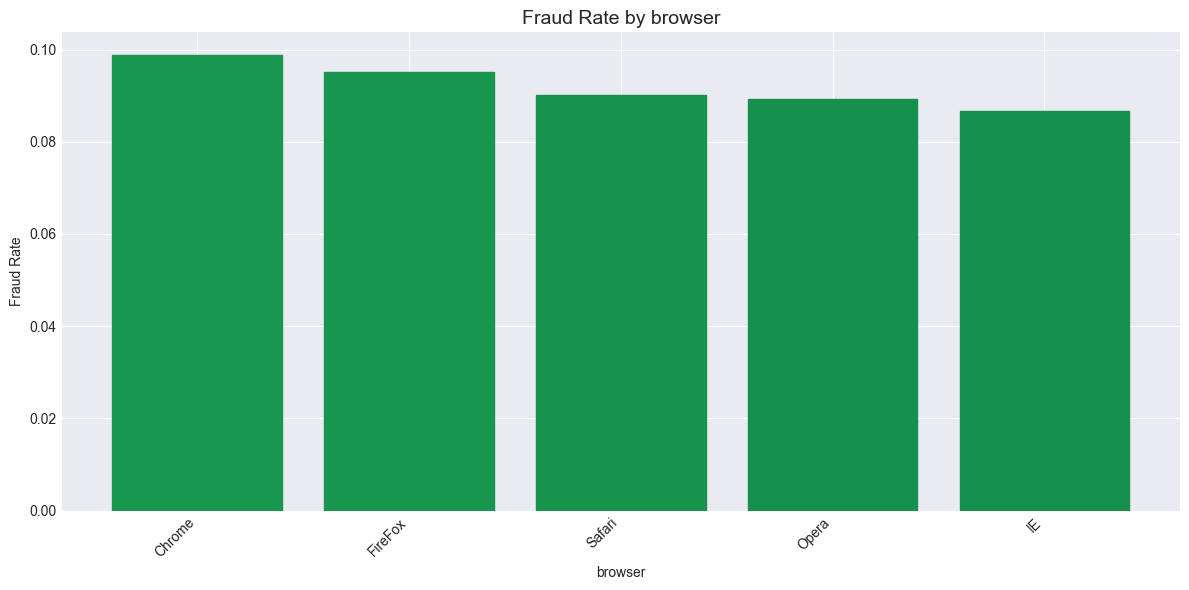

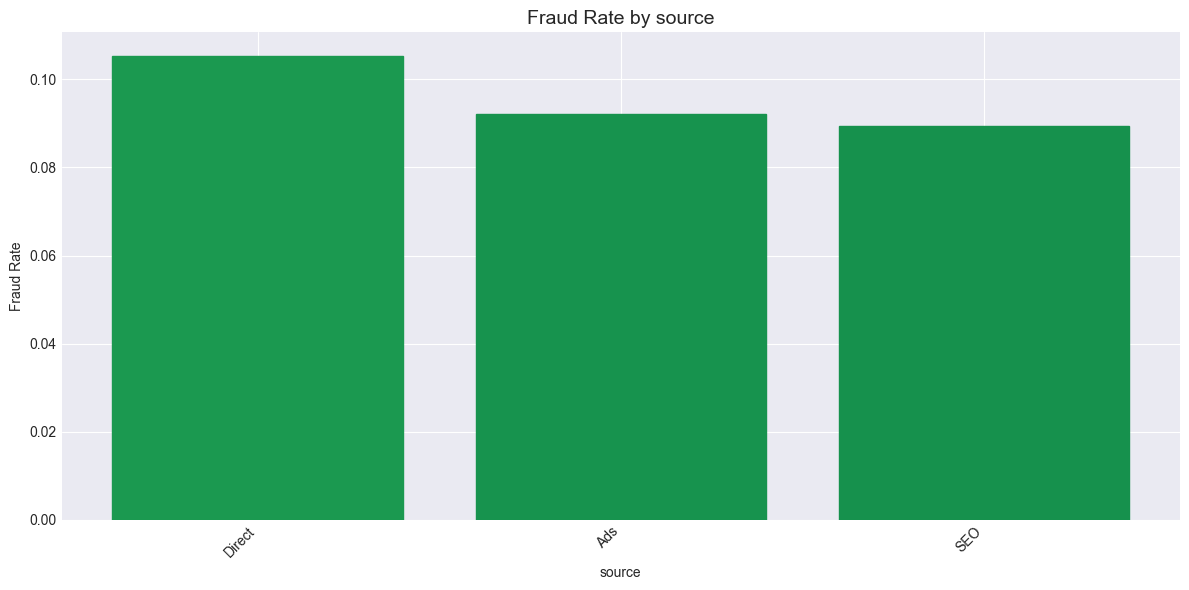

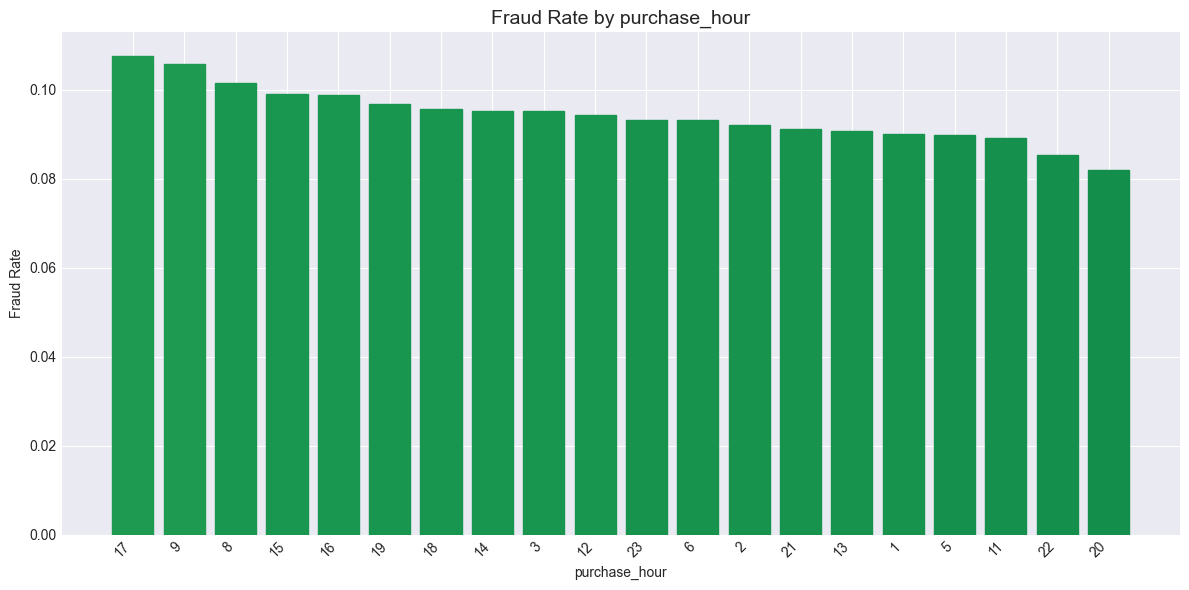

In [1]:
# EDA for Fraud Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath("../src"))

from data_preprocessing import DataPreprocessor
from feature_engineering import FeatureEngineer
from utils import *

# Setup
setup_logging()
preprocessor = DataPreprocessor()
feature_engineer = FeatureEngineer()

# Load data
fraud_data, ip_country, _ = preprocessor.load_data(
    '../data/raw/Fraud_Data.csv',
    '../data/raw/IpAddress_to_Country.csv',
    '../data/raw/creditcard.csv'
)

# Clean data
fraud_clean = preprocessor.clean_fraud_data(fraud_data)

# Map IP to country
fraud_with_country = preprocessor.map_ip_to_country(fraud_clean, ip_country)

# Analyze class distribution
dist = preprocessor.analyze_class_distribution(fraud_with_country, 'class')

# Create features
fraud_features = feature_engineer.create_time_features(fraud_with_country)
fraud_features = feature_engineer.create_transaction_features(fraud_features)
fraud_features = feature_engineer.create_browser_source_features(fraud_features)

# Visualizations
plot_class_distribution(fraud_features['class'], 'E-commerce Fraud Data')

# Plot distributions
numeric_features = ['purchase_value', 'age', 'time_since_signup', 'transaction_velocity']
plot_feature_distributions(fraud_features, numeric_features)

# Fraud by features
plot_fraud_by_feature(fraud_features, 'country')
plot_fraud_by_feature(fraud_features, 'browser')
plot_fraud_by_feature(fraud_features, 'source')
plot_fraud_by_feature(fraud_features, 'purchase_hour')

# Save processed data
fraud_features.to_csv('../data/processed/fraud_data_processed.csv', index=False)